In [1]:
%cd ..

d:\Projects\vislang\vis_lang


In [2]:
from cifar10 import *
from cifar100 import *
from cifar100_emb import *
from cifar10_emb import *

from utils import *

In [4]:
def init_model(ModelClass):
    variant = ModelClass(init_root())
    variant.set_up_model_architecture(300)
    variant.load_best()
    return variant

models = [init_model(_cls) for _cls in [Cifar100Emb]]

In [5]:
cifar10 = Cifar10Emb(init_root())
cifar10.init_word_vectors()
cifar10.init_datasets()
cifar10.init_dataloaders()
cifar10.set_up_model_architecture(300)
cifar10.init_word_lookup()

Files already downloaded and verified
Files already downloaded and verified


In [6]:
torch.set_grad_enabled(False)

preds = {k: [] for k in models}
gt = []

for i, data in enumerate(cifar10.test_loader):
    inputs, labels = data
    gt += labels.tolist()

    device = get_device()
    inputs, labels = inputs.to(device), labels.to(device)

    for variant in models:
        outputs = variant.model(inputs)
        preds[variant] += cifar10.find_closest_words(cifar10.model.word_lookup, outputs, mode=variant.similarity_mode).tolist()

gt = np.array(gt)
for variant in preds:
    preds[variant] = np.array(preds[variant])

In [7]:
# Print accuracies
for variant in models:
    acc = (preds[variant] == gt).mean()
    print(f'{variant.variant_name:30s}: {acc*100:6.2f}%')

cifar100_emb                  :  27.86%


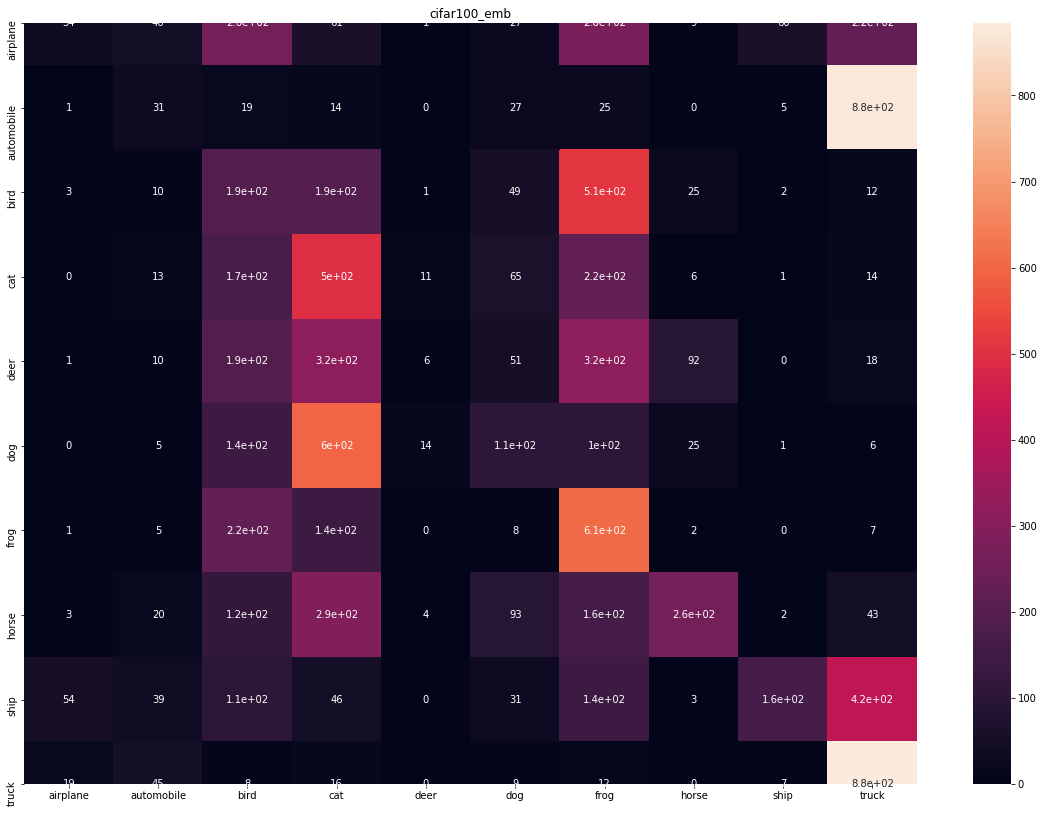

In [21]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

class_names = cifar10.class_names # [x for x in cifar100.class_names if x not in cifar100.classes_to_remove]

for variant in preds:
    C = metrics.confusion_matrix(gt, preds[variant], list(range(len(class_names))))

    plt.figure(figsize=(20, 14))
    plt.title(variant.variant_name)
    sn.heatmap(pd.DataFrame(C, index=class_names, columns=class_names), annot=True)

In [32]:
min(gt)

0